# Projection for 2011 and 2021 Census Data
This notebook is for the 2 projections for 2011 and 2021 census data. I used PCA and UMAP to reduce the dimensions of the data, and used Kmeans to cluster the results of UMAP.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Read the prepared data (2011 and 2021)

The `raw_2011.csv` and `raw_2021.csv` are the prepared data for 2011 and 2021 respectively, which are the cleaned and transformed data from the original census data.

I picked up some interesting columns from the original data, and create a new raw "London" for all the boroughs in London. 
The features include the age structure, the qualification, the occupation.

I will use the data to explore an economic and social problem: "How have changes in the socio-economic structure of the UK been reflected in the age structure and occupational distribution of the population over the last decade?"

Then I will use PCA and UMAP to reduce the dimensions of the data, and use Kmeans to cluster the results of UMAP. 

Finally I will use Tableau to visualize the results and try to answer the question.

In [3]:
df_2011 = pd.read_csv('./final_data/raw_2011.csv')
df_2021 = pd.read_csv('./final_data/raw_2021.csv')

# 2. PCA
## 2.1 2011 Census Data


In [5]:
df_2011_filter = df_2011.select_dtypes(include=['float64', 'int64'])

# Standardize the numerical data
scaler = StandardScaler()
df_2011_scaled = scaler.fit_transform(df_2011_filter)

# Perform PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_2011_scaled)
pca.explained_variance_ratio_

array([0.9746694 , 0.01949762])

In [6]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=df_2011_filter.columns)

print("PCA1 TOP Feature：",loading_matrix['PC1'].idxmax())
print("PCA2 TOP Feature：",loading_matrix['PC2'].idxmax())
# loading_matrix

PCA1 TOP Feature： All_Occupation: Caring, leisure and other service occupations
PCA2 TOP Feature： Qualification: Other


In [7]:
# add the principal components to the original dataframe
df_2011['PC1'] = principal_components[:, 0]
df_2011['PC2'] = principal_components[:, 1]
df_2011

,geography,geography_code,Age: 0-14,Age: 15-24,Age: 25-44,Age: 45-64,Age: 65+,Qualification: No,Qualification: Level 1,Qualification: Level 2,...,All_Occupation: Professional occupations,All_Occupation: Associate professional and technical occupations,All_Occupation: Administrative and secretarial occupations,All_Occupation: Skilled trades occupations,"All_Occupation: Caring, leisure and other service occupations",All_Occupation: Sales and customer service occupations,"All_Occupation: Process, plant and machine operatives",All_Occupation: Elementary occupations,PC1,PC2
0,Darlington,E06000005,18877.0,12479.0,27524.0,28245.0,18439.0,21179.0,11445.0,13568.0,...,7447.0,5741.0,5886.0,5808.0,4832.0,5461.0,3562.0,5638.0,-1.960335,0.392239
1,County Durham,E06000047,82102.0,68422.0,126778.0,143595.0,92345.0,116948.0,57032.0,67905.0,...,33042.0,24335.0,25774.0,28753.0,23446.0,21042.0,23243.0,28090.0,0.910167,-0.634518
2,Hartlepool,E06000001,16543.0,12233.0,22491.0,25163.0,15598.0,22758.0,10057.0,11992.0,...,4921.0,3958.0,3853.0,5126.0,4359.0,3880.0,3879.0,4756.0,-2.064782,0.379413
3,Middlesbrough,E06000002,26192.0,21754.0,35179.0,34596.0,20691.0,33002.0,15053.0,16891.0,...,7247.0,5177.0,5541.0,6437.0,6646.0,6077.0,5483.0,8055.0,-1.774112,0.340551
4,Northumberland,E06000057,50025.0,34688.0,72343.0,95668.0,63304.0,62584.0,35791.0,43363.0,...,22807.0,16827.0,16891.0,19038.0,15579.0,12688.0,11390.0,16222.0,-0.469260,-0.168688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Blaenau Gwent,W06000019,11626.0,9281.0,17853.0,18577.0,12477.0,20662.0,9035.0,8879.0,...,3086.0,2390.0,2676.0,3718.0,3720.0,2467.0,3873.0,4419.0,-2.225220,0.478554
138,Torfaen,W06000020,16034.0,11666.0,22283.0,24722.0,16370.0,21329.0,11094.0,12052.0,...,5128.0,4293.0,4921.0,5378.0,4493.0,3781.0,4113.0,4976.0,-2.067235,0.422184
139,Monmouthshire,W06000021,15092.0,10040.0,19790.0,27358.0,19043.0,15521.0,9446.0,11531.0,...,8697.0,4985.0,4199.0,5545.0,3706.0,2946.0,2491.0,4784.0,-2.091507,0.469729
140,Newport,W06000022,27502.0,19922.0,38225.0,36336.0,23751.0,31454.0,16399.0,17834.0,...,9812.0,7071.0,8052.0,6724.0,6204.0,6461.0,5270.0,8822.0,-1.716436,0.371273


## 2.2 2021 Census Data


In [8]:
# choose numerical columns
df_2021_filter = df_2021.select_dtypes(include=['float64', 'int64'])

# standardize the numerical data
scaler = StandardScaler()
df_2021_scaled = scaler.fit_transform(df_2021_filter)

# perform PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_2021_scaled)
pca.explained_variance_ratio_

array([0.98175932, 0.01285866])

In [9]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=df_2021_filter.columns)

print("PCA1 TOP Feature：",loading_matrix['PC1'].idxmax())
print("PCA2 TOP Feature：",loading_matrix['PC2'].idxmax())
loading_matrix

PCA1 TOP Feature： Age: 45-64
PCA2 TOP Feature： Qualification: Level 4 and above


,PC1,PC2
Age: 0-14,0.999596,0.075123
Age: 15-24,0.993600,0.102285
Age: 25-44,0.991891,0.150732
Age: 45-64,1.002814,-0.013293
Age: 65+,0.971916,-0.236935
Qualification: No,0.997959,0.004988
Qualification: Level 1,0.997946,-0.090437
Qualification: Level 2,0.994895,-0.123272
Qualification: Apprenticeship,0.971923,-0.243989
Qualification: Level 3,0.997895,-0.078036


In [10]:
# add the principal components to the original dataframe
df_2021['PC1'] = principal_components[:, 0]
df_2021['PC2'] = principal_components[:, 1]
df_2021

,geography,geography_code,Age: 0-14,Age: 15-24,Age: 25-44,Age: 45-64,Age: 65+,Qualification: No,Qualification: Level 1,Qualification: Level 2,...,All_Occupation: Professional occupations,All_Occupation: Associate professional and technical occupations,All_Occupation: Administrative and secretarial occupations,All_Occupation: Skilled trades occupations,"All_Occupation: Caring, leisure and other service occupations",All_Occupation: Sales and customer service occupations,"All_Occupation: Process, plant and machine operatives",All_Occupation: Elementary occupations,PC1,PC2
0,Hartlepool,E06000001,16484.0,10290.0,21907.0,25423.0,18233.0,17286.0,7076.0,10963.0,...,5838.0,4497.0,3391.0,4736.0,4381.0,3613.0,3622.0,4323.0,-2.074663,0.319842
1,Middlesbrough,E06000002,28188.0,18742.0,38061.0,34755.0,24180.0,27282.0,11221.0,15270.0,...,8996.0,6109.0,4856.0,5906.0,7578.0,5394.0,5577.0,7609.0,-1.771146,0.291397
2,Redcar and Cleveland,E06000003,22681.0,13699.0,30225.0,38181.0,31747.0,24732.0,10983.0,15663.0,...,8411.0,6605.0,4983.0,6800.0,7430.0,4760.0,5345.0,6488.0,-1.773994,0.183482
3,Stockton-on-Tees,E06000004,36183.0,20306.0,50071.0,52851.0,37184.0,29441.0,15324.0,23005.0,...,16671.0,10903.0,8413.0,8868.0,8858.0,7330.0,6993.0,9421.0,-1.413416,0.180325
4,Darlington,E06000005,18452.0,11211.0,26551.0,29547.0,22040.0,16972.0,8276.0,12733.0,...,8463.0,5973.0,4961.0,5042.0,4895.0,4657.0,3847.0,6228.0,-1.956936,0.307438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Monmouthshire,W06000021,13759.0,8440.0,19165.0,27553.0,24040.0,12315.0,6463.0,10589.0,...,9315.0,5427.0,3794.0,4895.0,3538.0,2824.0,2485.0,3979.0,-2.091555,0.354115
138,Newport,W06000022,30284.0,17410.0,44696.0,40142.0,27060.0,27690.0,11741.0,18188.0,...,13767.0,9109.0,7623.0,6347.0,6761.0,6534.0,6140.0,9085.0,-1.653321,0.334162
139,Powys,W06000023,19267.0,12116.0,26113.0,38553.0,37119.0,21316.0,9694.0,16747.0,...,9056.0,6334.0,5038.0,12196.0,6553.0,4217.0,4610.0,6326.0,-1.772355,0.167235
140,Merthyr Tydfil,W06000024,10539.0,6336.0,15200.0,15655.0,11110.0,12831.0,4556.0,6911.0,...,3751.0,2799.0,2220.0,3140.0,3183.0,2475.0,2597.0,3324.0,-2.283308,0.403756


# 3. UMAP

In [15]:
umap_2011 = umap.UMAP(n_neighbors=15, min_dist=0.5, n_components=2, random_state=42)
umap_2011_result = umap_2011.fit_transform(df_2011_scaled)

# add the UMAP results to the original dataframe
df_2011['UMAP1'] = umap_2011_result[:, 0]
df_2011['UMAP2'] = umap_2011_result[:, 1]
df_2011

E:\Programming\anaconda3\envs\mytorch\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,geography,geography_code,Age: 0-14,Age: 15-24,Age: 25-44,Age: 45-64,Age: 65+,Qualification: No,Qualification: Level 1,Qualification: Level 2,...,All_Occupation: Administrative and secretarial occupations,All_Occupation: Skilled trades occupations,"All_Occupation: Caring, leisure and other service occupations",All_Occupation: Sales and customer service occupations,"All_Occupation: Process, plant and machine operatives",All_Occupation: Elementary occupations,PC1,PC2,UMAP1,UMAP2
0,Darlington,E06000005,18877.0,12479.0,27524.0,28245.0,18439.0,21179.0,11445.0,13568.0,...,5886.0,5808.0,4832.0,5461.0,3562.0,5638.0,-1.960335,0.392239,13.656599,0.320405
1,County Durham,E06000047,82102.0,68422.0,126778.0,143595.0,92345.0,116948.0,57032.0,67905.0,...,25774.0,28753.0,23446.0,21042.0,23243.0,28090.0,0.910167,-0.634518,-0.097025,3.309999
2,Hartlepool,E06000001,16543.0,12233.0,22491.0,25163.0,15598.0,22758.0,10057.0,11992.0,...,3853.0,5126.0,4359.0,3880.0,3879.0,4756.0,-2.064782,0.379413,14.317477,0.193409
3,Middlesbrough,E06000002,26192.0,21754.0,35179.0,34596.0,20691.0,33002.0,15053.0,16891.0,...,5541.0,6437.0,6646.0,6077.0,5483.0,8055.0,-1.774112,0.340551,11.385693,-0.348058
4,Northumberland,E06000057,50025.0,34688.0,72343.0,95668.0,63304.0,62584.0,35791.0,43363.0,...,16891.0,19038.0,15579.0,12688.0,11390.0,16222.0,-0.469260,-0.168688,2.693817,4.456157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Blaenau Gwent,W06000019,11626.0,9281.0,17853.0,18577.0,12477.0,20662.0,9035.0,8879.0,...,2676.0,3718.0,3720.0,2467.0,3873.0,4419.0,-2.225220,0.478554,14.785909,-0.231930
138,Torfaen,W06000020,16034.0,11666.0,22283.0,24722.0,16370.0,21329.0,11094.0,12052.0,...,4921.0,5378.0,4493.0,3781.0,4113.0,4976.0,-2.067235,0.422184,14.198003,-0.395430
139,Monmouthshire,W06000021,15092.0,10040.0,19790.0,27358.0,19043.0,15521.0,9446.0,11531.0,...,4199.0,5545.0,3706.0,2946.0,2491.0,4784.0,-2.091507,0.469729,14.464297,0.024643
140,Newport,W06000022,27502.0,19922.0,38225.0,36336.0,23751.0,31454.0,16399.0,17834.0,...,8052.0,6724.0,6204.0,6461.0,5270.0,8822.0,-1.716436,0.371273,10.913190,0.466162


In [16]:
umap_2021 = umap.UMAP(n_neighbors=10, min_dist=0.5, n_components=2, random_state=42)
umap_2021_result = umap_2021.fit_transform(df_2021_scaled)

# add the UMAP results to the original dataframe
df_2021['UMAP1'] = umap_2021_result[:, 0]
df_2021['UMAP2'] = umap_2021_result[:, 1]
df_2021

E:\Programming\anaconda3\envs\mytorch\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,geography,geography_code,Age: 0-14,Age: 15-24,Age: 25-44,Age: 45-64,Age: 65+,Qualification: No,Qualification: Level 1,Qualification: Level 2,...,All_Occupation: Administrative and secretarial occupations,All_Occupation: Skilled trades occupations,"All_Occupation: Caring, leisure and other service occupations",All_Occupation: Sales and customer service occupations,"All_Occupation: Process, plant and machine operatives",All_Occupation: Elementary occupations,PC1,PC2,UMAP1,UMAP2
0,Hartlepool,E06000001,16484.0,10290.0,21907.0,25423.0,18233.0,17286.0,7076.0,10963.0,...,3391.0,4736.0,4381.0,3613.0,3622.0,4323.0,-2.074663,0.319842,10.222996,0.299000
1,Middlesbrough,E06000002,28188.0,18742.0,38061.0,34755.0,24180.0,27282.0,11221.0,15270.0,...,4856.0,5906.0,7578.0,5394.0,5577.0,7609.0,-1.771146,0.291397,6.847424,2.318918
2,Redcar and Cleveland,E06000003,22681.0,13699.0,30225.0,38181.0,31747.0,24732.0,10983.0,15663.0,...,4983.0,6800.0,7430.0,4760.0,5345.0,6488.0,-1.773994,0.183482,7.323519,1.345585
3,Stockton-on-Tees,E06000004,36183.0,20306.0,50071.0,52851.0,37184.0,29441.0,15324.0,23005.0,...,8413.0,8868.0,8858.0,7330.0,6993.0,9421.0,-1.413416,0.180325,7.354157,5.508878
4,Darlington,E06000005,18452.0,11211.0,26551.0,29547.0,22040.0,16972.0,8276.0,12733.0,...,4961.0,5042.0,4895.0,4657.0,3847.0,6228.0,-1.956936,0.307438,9.584308,1.126176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Monmouthshire,W06000021,13759.0,8440.0,19165.0,27553.0,24040.0,12315.0,6463.0,10589.0,...,3794.0,4895.0,3538.0,2824.0,2485.0,3979.0,-2.091555,0.354115,9.667690,0.216019
138,Newport,W06000022,30284.0,17410.0,44696.0,40142.0,27060.0,27690.0,11741.0,18188.0,...,7623.0,6347.0,6761.0,6534.0,6140.0,9085.0,-1.653321,0.334162,7.281506,3.036101
139,Powys,W06000023,19267.0,12116.0,26113.0,38553.0,37119.0,21316.0,9694.0,16747.0,...,5038.0,12196.0,6553.0,4217.0,4610.0,6326.0,-1.772355,0.167235,8.028336,1.199607
140,Merthyr Tydfil,W06000024,10539.0,6336.0,15200.0,15655.0,11110.0,12831.0,4556.0,6911.0,...,2220.0,3140.0,3183.0,2475.0,2597.0,3324.0,-2.283308,0.403756,10.404365,-0.438953


E:\Programming\anaconda3\envs\mytorch\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use n

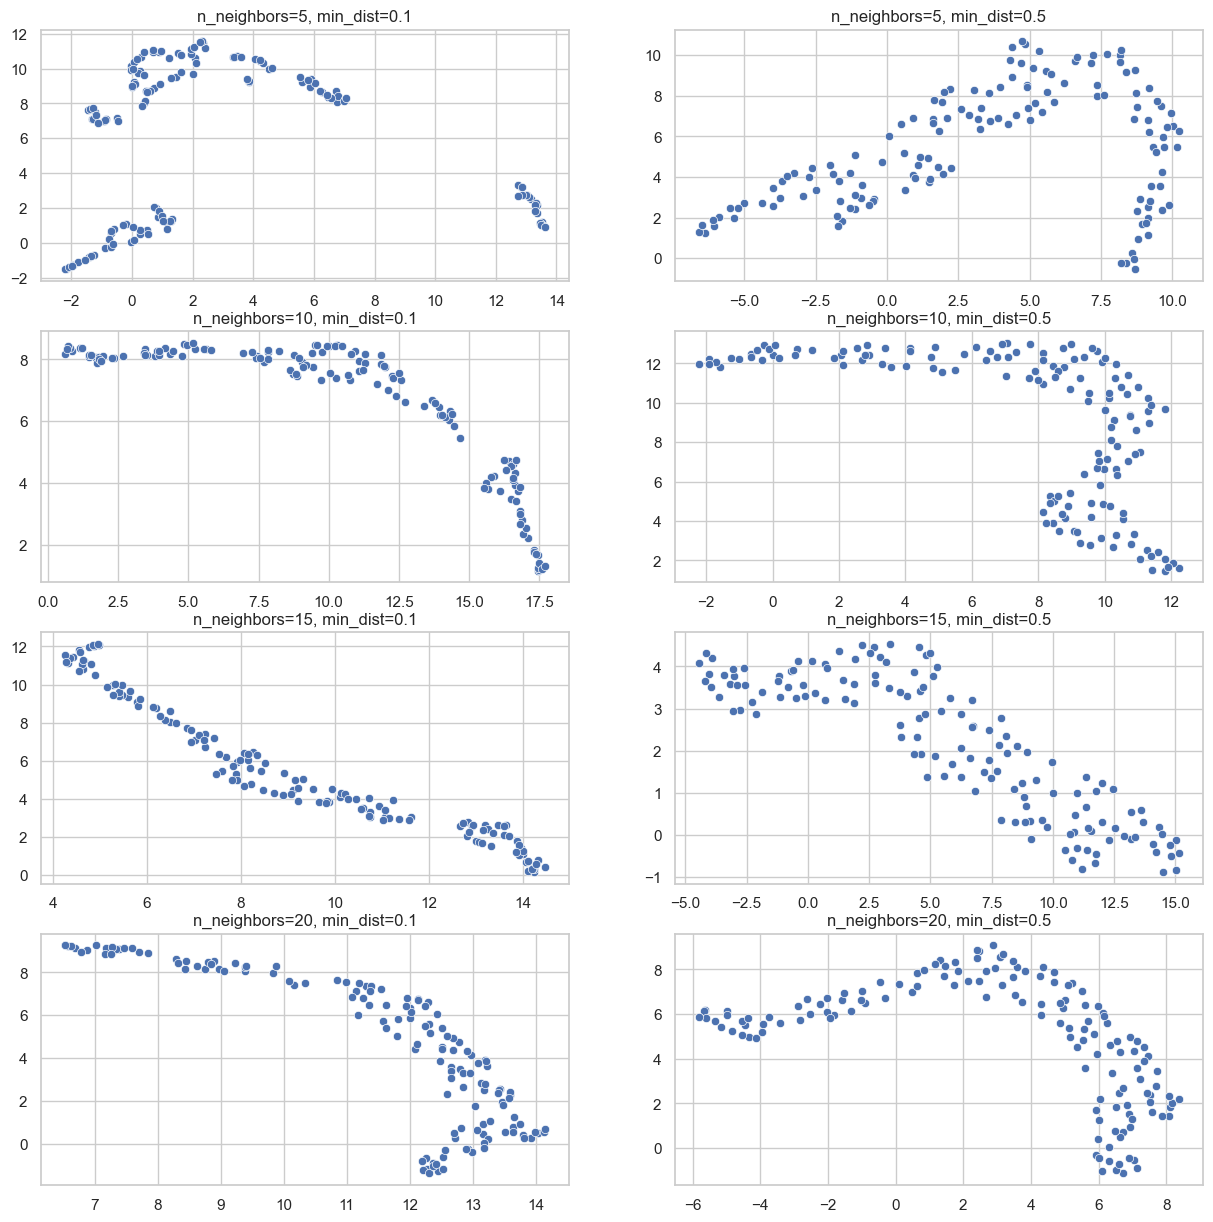

In [13]:
sns.set(style="whitegrid")
# grid search for UMAP
n_neighbors = [5, 10, 15, 20]
min_dist = [0.1, 0.5]

fig, ax = plt.subplots(4, 2, figsize=(15, 15))
for i, n in enumerate(n_neighbors):
    for j, d in enumerate(min_dist):
        umap_ = umap.UMAP(n_neighbors=n, min_dist=d, n_components=2, random_state=42)
        umap_result = umap_.fit_transform(df_2011_scaled)
        sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], ax=ax[i, j])
        ax[i, j].set_title(f'n_neighbors={n}, min_dist={d}')
plt.show()

E:\Programming\anaconda3\envs\mytorch\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use n

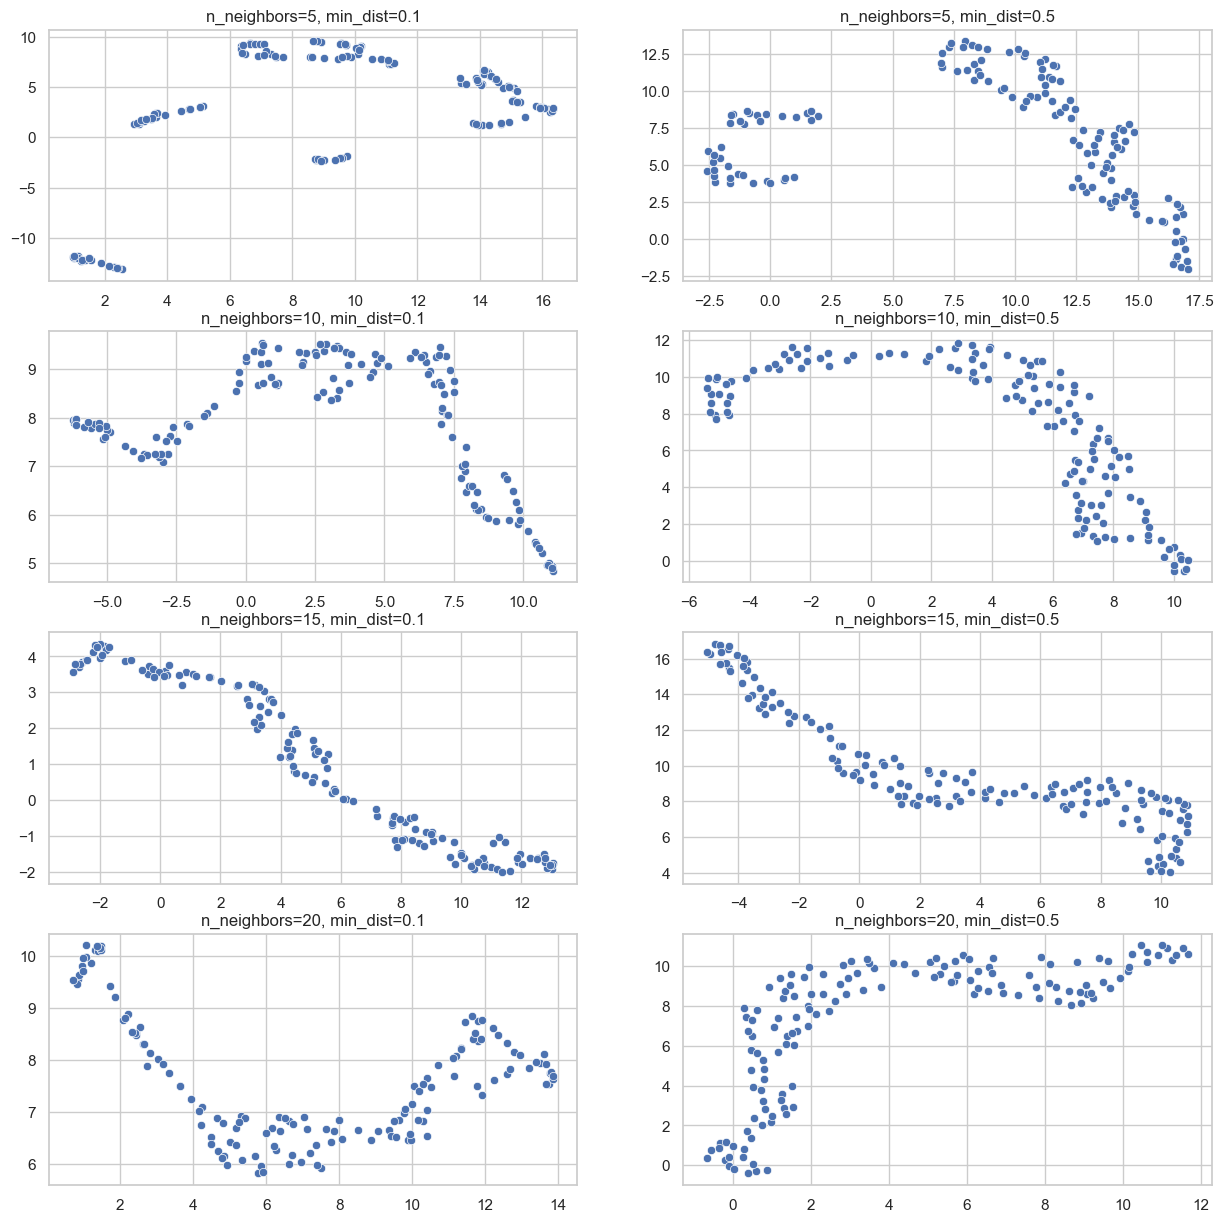

In [14]:
fig, ax = plt.subplots(4, 2, figsize=(15, 15))
for i, n in enumerate(n_neighbors):
    for j, d in enumerate(min_dist):
        umap_ = umap.UMAP(n_neighbors=n, min_dist=d, n_components=2, random_state=42)
        umap_result = umap_.fit_transform(df_2021_scaled)
        sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], ax=ax[i, j])
        ax[i, j].set_title(f'n_neighbors={n}, min_dist={d}')
plt.show()

## Best UMAP Parameters
- 2011: n_neighbors=15, min_dist=0.5
- 2021: n_neighbors=10, min_dist=0.5

# 4. Kmeans for UMAP

E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to ha

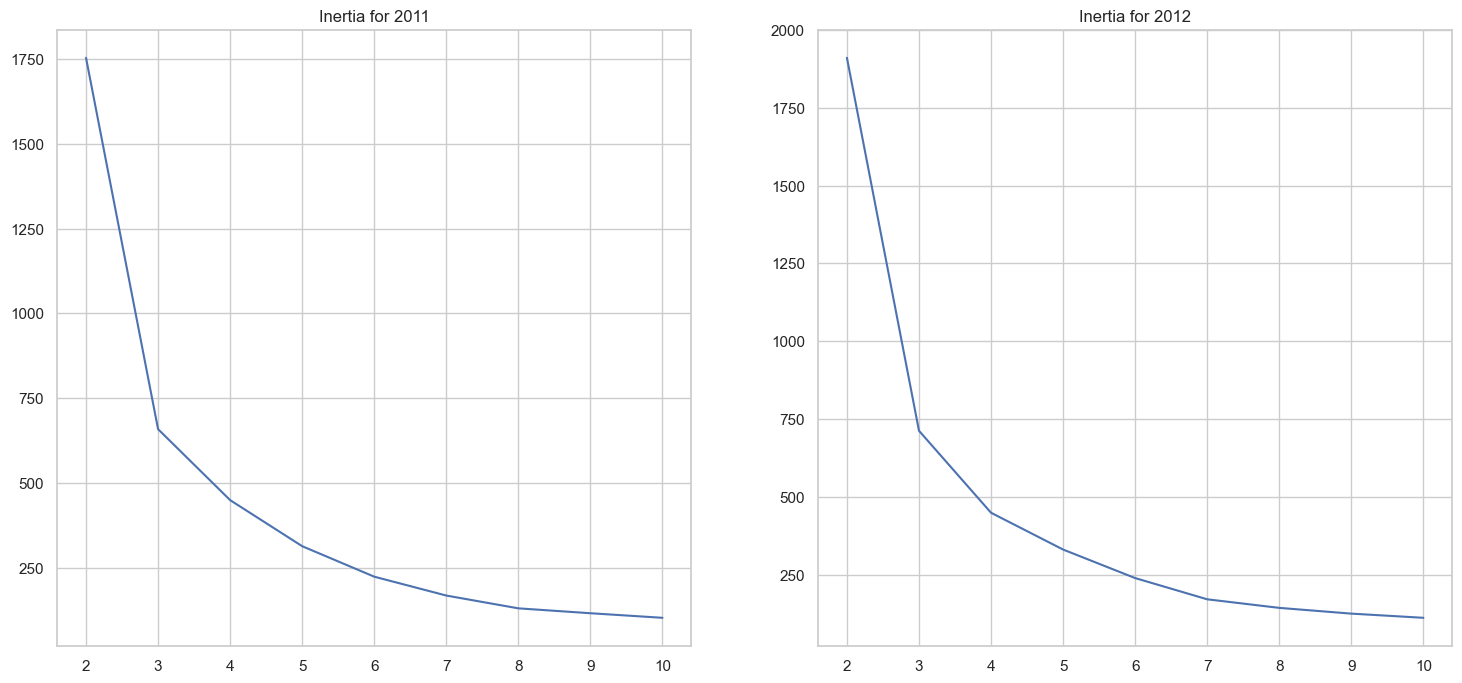

In [102]:
# find the best number of clusters for 2011 and 2021
inertia = []
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
for i, df in enumerate([df_2011, df_2021]):
    for n_clusters in range(2, 11):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(df[['UMAP1', 'UMAP2']])
        inertia.append(kmeans.inertia_)
    sns.lineplot(x=range(2, 11), y=inertia, ax=axes[i])
    axes[i].set_title(f'Inertia for {2011 + i}')
    inertia = []
plt.show()
# still use k=3 for both 2011 and 2021

In [17]:
kmeans_2011 = KMeans(n_clusters=3, random_state=42)
kmeans_2011.fit(df_2011[['UMAP1', 'UMAP2']])
df_2011['Cluster'] = kmeans_2011.labels_

kmeans_2021 = KMeans(n_clusters=3, random_state=42)
kmeans_2021.fit(df_2021[['UMAP1', 'UMAP2']])
df_2021['Cluster'] = kmeans_2021.labels_

E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to ha

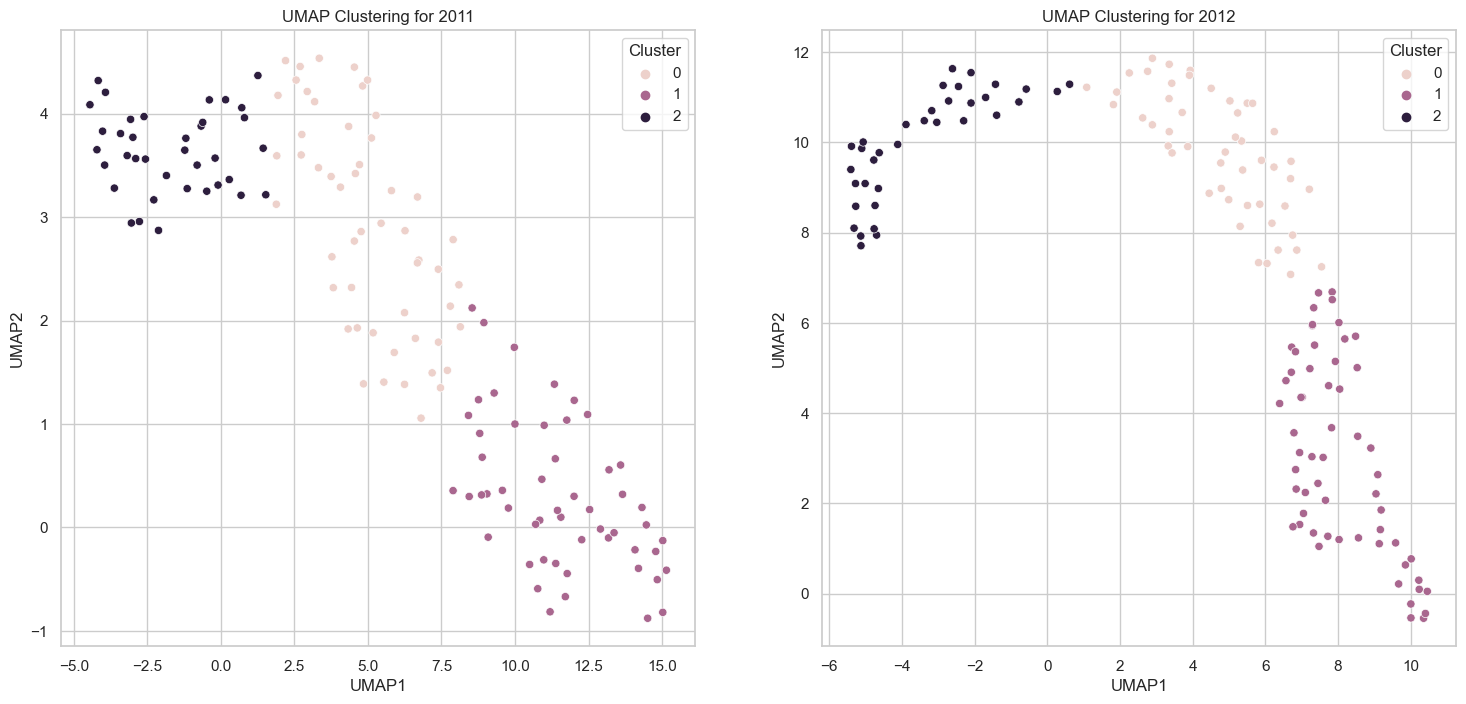

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
for i, df in enumerate([df_2011, df_2021]):
    sns.scatterplot(x='UMAP1', y='UMAP2', hue='Cluster', data=df, ax=axes[i])
    axes[i].set_title(f'UMAP Clustering for {2011 + i}')
plt.show()

Save the dataframe with PCA and UMAP results, add the cluster labels.
Later we can directly use the `clustered_2011.csv` and `clustered_2021.csv` in Tableau for visualization.

In [106]:
df_2011.to_csv('./final_data/clustered_2011.csv', index=False)
df_2021.to_csv('./final_data/clustered_2021.csv', index=False)